# Food Demand Forecasting for Food Delivery Company using IBM Cloud

## Author: Himanshu Agarkar
<hr style="height:2px;border-width:0;color:black;background-color:black">

## Step 1: Data Pre-Processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
train.head()

In [ ]:
test.head()

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [45]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [46]:
#Checking for null values

train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

### Reading and merging .csv files

Merging train.csv and meal_info.csv dataset by using common key id 	

We notice that meal_id column in train.csv is similar to meal_id in meal_info.csv dataset. Let us merge these two datasets, train.csv and meal_info.csv using common key meal_id and name the table as trainfinal. <hr style="height:2px;border-width:0;color:black;background-color:black">

Merging trainfinal.csv and center_info.csv dataset by using common key id 	

We notice that center_id column in trainfinal.csv is similar to center_id in center_info.csv dataset. Let us merge these two datasets, trainfinal.csv and center_info.csv using common key center_id and store it back in trainfinal. Display the first five rows of trainfinal using head().

In [47]:
#Reading and merging .csv files

meal_info = pd.read_csv("meal_info.csv")
center_info = pd.read_csv("fulfilment_center_info.csv")
trainfinal = pd.merge(train, meal_info, on="meal_id", how="outer")
trainfinal = pd.merge(trainfinal, center_info, on="center_id", how="outer")
trainfinal.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [48]:
#Dropping Columns

trainfinal = trainfinal.drop(['center_id', 'meal_id'], axis=1)
trainfinal.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


### Label Ecoding

Typically, any structured dataset includes multiple columns with combination of numerical as well as categorical variables. A machine can only understand the numbers. It cannot understand the text. That’s essentially the case with Machine Learning algorithms too. 

Reference Link: https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/?utm_source=blog&utm_medium=one-hot-encoding-vs-label-encoding-using-scikit-learn

We need to convert each text category to numbers in order for the machine to process those using mathematical equations.<hr style="height:2px;border-width:0;color:black;background-color:black">

How should we handle categorical variables? There are Multiple way to handle, but will see one of it is Label Encoding. 

<b>Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.</b>

Let’s see how to implement label encoding in Python using the scikit-learn library.

As we have to convert only the text class category columns, we first select it then we will implement Label Encoding to it.

In [49]:
cols = trainfinal.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [50]:
cols = cols[:2] + cols[9:] + cols[7:9] + cols[2:7]
print(cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [51]:
trainfinal = trainfinal[cols]
trainfinal.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

### Data Visualization

Data visualization is where a given data set is presented in a graphical format. It helps the detection of patterns, trends and correlations that might go undetected in text-based data.

Understanding your data and the relationship present within it is just as important as any algorithm used to train your machine learning model. In fact, even the most sophisticated machine learning models will perform poorly on data that wasn’t visualized and understood properly.

To visualize the dataset we need libraries called Matplotlib and Seaborn.

The Matplotlib library is a Python 2D plotting library which allows you to generate plots, scatter plots, histograms, bar charts etc. 

Let’s visualize our data using Matplotlib and searborn library.

<b>Before diving into the code, let's look at some of the basic properties we will be using when plotting.</b>

xlabel: Set the label for the x-axis.

ylabel: Set the label for the y-axis.

title: Set a title for the axes.

Legend: Place a legend on the axes.<hr style="height:2px;border-width:0;color:black;background-color:black">

Let’s visualize our data using Matplotlib and searborn library.

<b>Univariate Analysis</b>

Univariate analysis is the simplest form of data analysis where the data being analyzed contains only one variable.

<b>Bivariate Analysis</b>

It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them.

Drop the column “id” and find the correlation between the columns.

Correlation is a statistical relationship between two variables and it could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable's value increases, the other variables' values decrease.

With the help of seaborn heatmap we will be plotting the heatmap and for finding the correlation between variable we have corr() available.

In [52]:
from sklearn.preprocessing import LabelEncoder

lb1 = LabelEncoder()
trainfinal['center_type'] = lb1.fit_transform(trainfinal['center_type'])

lb2 = LabelEncoder()
trainfinal['category'] = lb1.fit_transform(trainfinal['category'])

lb3 = LabelEncoder()
trainfinal['cuisine'] = lb1.fit_transform(trainfinal['cuisine'])
trainfinal.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,647,56,2,2.0,0,3,136.83,152.29,0,0,177
1,1018704,2,647,56,2,2.0,0,3,135.83,152.29,0,0,323
2,1196273,3,647,56,2,2.0,0,3,132.92,133.92,0,0,96
3,1116527,4,647,56,2,2.0,0,3,135.86,134.86,0,0,163
4,1343872,5,647,56,2,2.0,0,3,146.50,147.50,0,0,215


In [53]:
trainfinal.shape

(456548, 13)

In [54]:
# plt.style.use('fivethirtyeight')
# plt.figure(figsize=(12, 7))
# sns.distplot(trainfinal.num_orders, bins = 25)
# plt.xlabel("num_orders")
# plt.ylabel("Number of Buyers")
# plt.title("num_oders Distribution")
# plt.text.Text(0.5, 1.0, 'num_orders Distribution')

In [55]:
trainfinal2 = trainfinal.drop(['id'], axis=1)
correlation = trainfinal2.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns

Index([u'num_orders', u'homepage_featured', u'emailer_for_promotion',
       u'op_area', u'cuisine', u'city_code', u'region_code', u'category'],
      dtype='object')

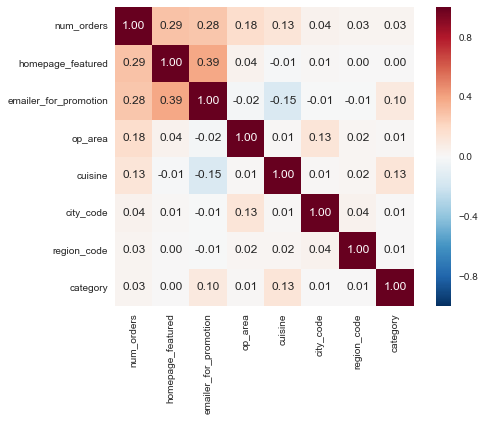

In [56]:
correlation_map = np.corrcoef(trainfinal2[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
plt.show()

### Splitting the Dataset into Dependent and Independent variable

In machine learning, the concept of dependent variable (y) and independent variables(x) is important to understand. Here, Dependent variable is nothing but output in dataset and independent variable is all inputs in the dataset. 

With this in mind, we need to split our dataset into the matrix of independent variables and the vector or dependent variable. Mathematically, Vector is defined as a matrix that has just one column.

Let’s split our dataset into independent and dependent variables.

1. The independent variable in the dataset would be considered as 'x' and the 'homepage_featured', 'emailer_for_promotion', 'op_area', 'cuisine', 'city_code', 'region_code', 'category' columns would be considered as independent variable.

2. The dependent variable in the dataset would be considered as 'y' and the 'num_orders' column is considered as dependent variable.

Now we will split the data into independent and dependent variables.

In [57]:
features = columns.drop(['num_orders'])
trainfinal3 = trainfinal[features]
X = trainfinal3.values
y = trainfinal['num_orders'].values
trainfinal3.head()

,homepage_featured,emailer_for_promotion,op_area,cuisine,city_code,region_code,category
0,0,0,2.0,3,647,56,0
1,0,0,2.0,3,647,56,0
2,0,0,2.0,3,647,56,0
3,0,0,2.0,3,647,56,0
4,0,0,2.0,3,647,56,0


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

<hr style="height:2px;border-width:0;color:black;background-color:black">
## Step 2: Model Building
### Train and Test Model Algorithms
There are several Machine learning algorithms to be used depending on the data you are going to process such as images, sound, text, and numerical values. The algorithms that you can choose according to the objective that you might have it may be Classification algorithms or Regression algorithms.

1. Linear Regression.
2. Lasso Regression.
3. ELasticNet Regression / Classification.
4. Decision Tree Regression / Classification.
5. KNeighors Regressor
6. Gradient Boosting Regressor
7. XGB Regressor

You will need to train the datasets to run smoothly and see an incremental improvement in the prediction rate.

<b>Linear regression</b> attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.

<b>Lasso regression</b> is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

<b>Elastic Net</b> is an extension of linear regression that adds regularization penalties to the loss function during training.

<b>A decision tree</b> is a supervised machine learning model used to predict a target by learning decision rules from features. 

<b>KNN regression</b> is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighborhood.

<b>Gradient boosting</b> is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

<b>XGBoost</b> is a powerful approach for building supervised regression models. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods.

In [2]:

import sys
!{sys.executable} -m pip install xgboost

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
export PYTHONPATH=PATH_TO_YOUR_setup.py_file
import xgboost as xgb
from xgboost import XGBRegressor

SyntaxError: invalid syntax (<ipython-input-3-9fa5e12fac64>, line 7)

### Model evaluation

We’re going to use x_train and y_train obtained above in train_test_split section to train our regression model. We’re using the fit method and passing the parameters as shown below.

Finally, we need to check to see how well our model is performing on the test data.

<b>Regression Evaluation Metrics</b><br><br>
RMSE: Root Mean Square Error<br>
RMSE is the square root of the averaged squared difference between the target value and the value predicted by the model. It is preferred more in some cases because the errors are first squared before averaging which poses a high penalty on large errors. This implies that RMSE is useful when large errors are undesired.

In [4]:
XG = XGBRegressor()
XG.fit(X_train, y_train)
y_pred = XG.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSE: ', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

NameError: name 'XGBRegressor' is not defined

In [ ]:
XG = XGBRegressor()
XG.fit(X_train, y_train)
y_pred = XG.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSE: ', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))